## Initial setup
##### This analysis using ema is based on the work of Enayat A. Moallemi created on 22 May 2018 at the Fraunhofer ISI, Karlsruhe. In that instance, the analysis was done for the MATISSE model.

In [ ]:

'''
Based on Enayat A. Moallemi version from May 2018

edited by Angela M. Rojas A. <angelara@student.unimelb.edu.au>

Created on 18 December 2019

'''
import sys
import os

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench')

sys.path.append(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments')

#from ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from EMAworkbench.ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from EMAworkbench.ema_workbench.analysis import prim
#import pareto
import os
import glob
import numpy as np
import pandas as pd
import os
import glob



## Load the results

In [ ]:
from EMAworkbench.ema_workbench import load_results

results = load_results(r'C:\Users\angel\Documents\GitHub\gr4sp\experiments\data\gr4sp_2020-Feb-24-LHS.tar.gz')


In [3]:
experiments, outcomes = results

# Create a temporary copy of dictionary, with Outcomes Year
outcomesYear = dict(outcomes)

keysToRemove = [] 
# Iterate over the temporary dictionary and delete corresponding key from original dictionary
for (key, value) in outcomesYear.items() :
    if 'Month' in key:
        keysToRemove.append(key)
        
for k in keysToRemove:        
    del outcomesYear[k]   
    
        

In [18]:
experiments.iloc[2041]

annualCpi                           0.0366493
annualInflation                     0.0417459
capacityFactorChangeBrownCoal               4
capacityFactorChangeWater                   1
consumption                       Slow change
distributionUsageChange                     6
energyEfficiency                  Slow change
generationRolloutPeriod                     4
generatorRetirement                         3
includePublicallyAnnouncedGen            True
learningCurve                       0.0124631
nonScheduleGenSpotMarket                 none
nonScheduleMinCapMarketGen            10.3826
priceChangePercentageBrownCoal             23
priceChangePercentageWater                 29
priceChangePercentageWind                 -15
retailUsageChange                          -9
rooftopPV                                both
semiScheduleGenSpotMarket                none
semiScheduleMinCapMarketGen           22.5884
solarUptake                       Fast change
technologicalImprovement          

In [5]:
#outcomes Options: wholesalePriceYear, GHGYear, tariffsYear, primarySpotProductionYear,
# secondarySpotProductionYear, offSpotProductionYear, rooftopPvProductionYear
# numActorsYear
outcomes_to_show = ['GHGYear','wholesalePriceYear', 'tariffsYear','primarySpotProductionYear', 'secondarySpotProductionYear', 
                    'offSpotProductionYear', 'rooftopPVProductionYear' ]

# 22 levers selected after EET
levers = ['consumption', 'energyEfficiency', 'rooftopPV', 'solarUptake','annualCpi','annualInflation',
          'includePublicallyAnnouncedGen','generationRolloutPeriod','generatorRetirement','technologicalImprovement',
          'priceChangePercentageBrownCoal','priceChangePercentageWind','priceChangePercentageWater','capacityFactorChangeBrownCoal','capacityFactorChangeWater',
          'distributionUsageChange','retailUsageChange',
          'semiScheduleGenSpotMarket','semiScheduleMinCapMarketGen', 'nonScheduleGenSpotMarket', 'nonScheduleMinCapMarketGen', 
          'learningCurve' ]

#from startYear
startYear = 1998
startYearShift = (startYear - 1998)
#startYearShift = (startYear - 1997) * 12
time = outcomes['TIMEYear'][0, startYearShift:]
#index = pd.to_datetime(time, format = '%Y-%m-%d')
index = pd.to_datetime(time, format = '%Y')


## Envelopes

array must not contain infs or NaNs
array must not contain infs or NaNs
singular matrix


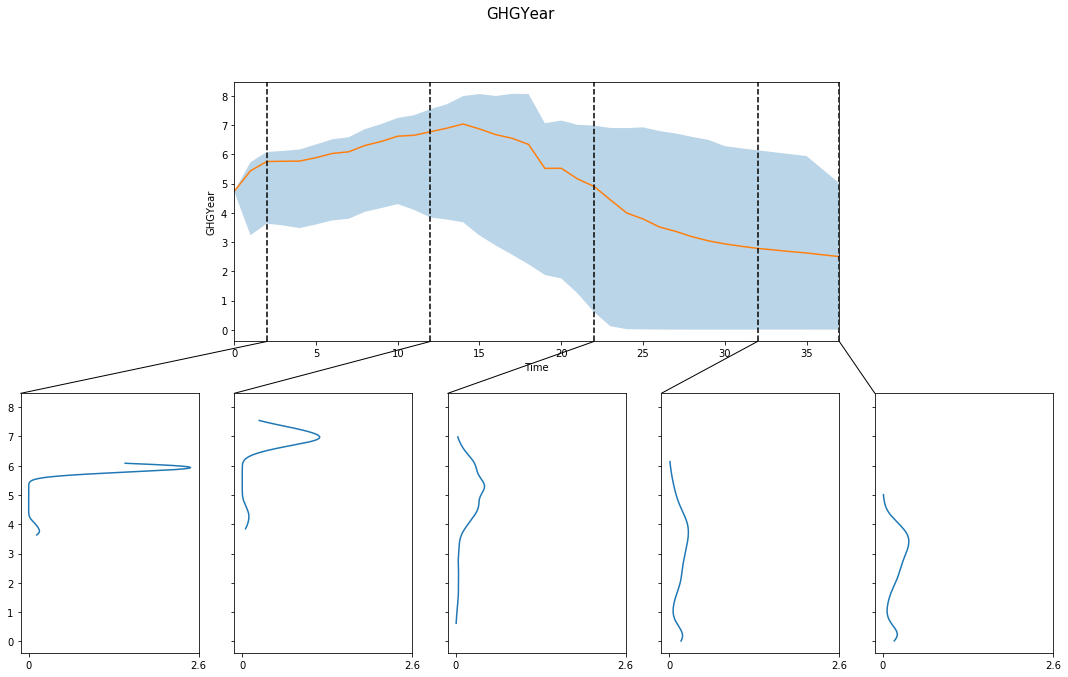

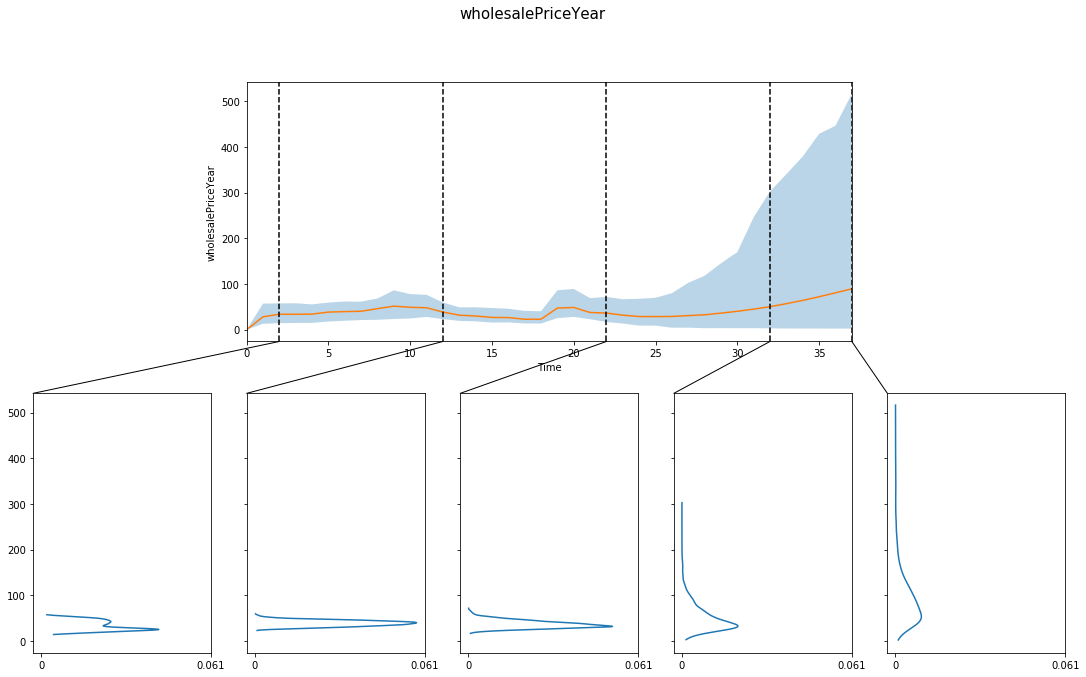

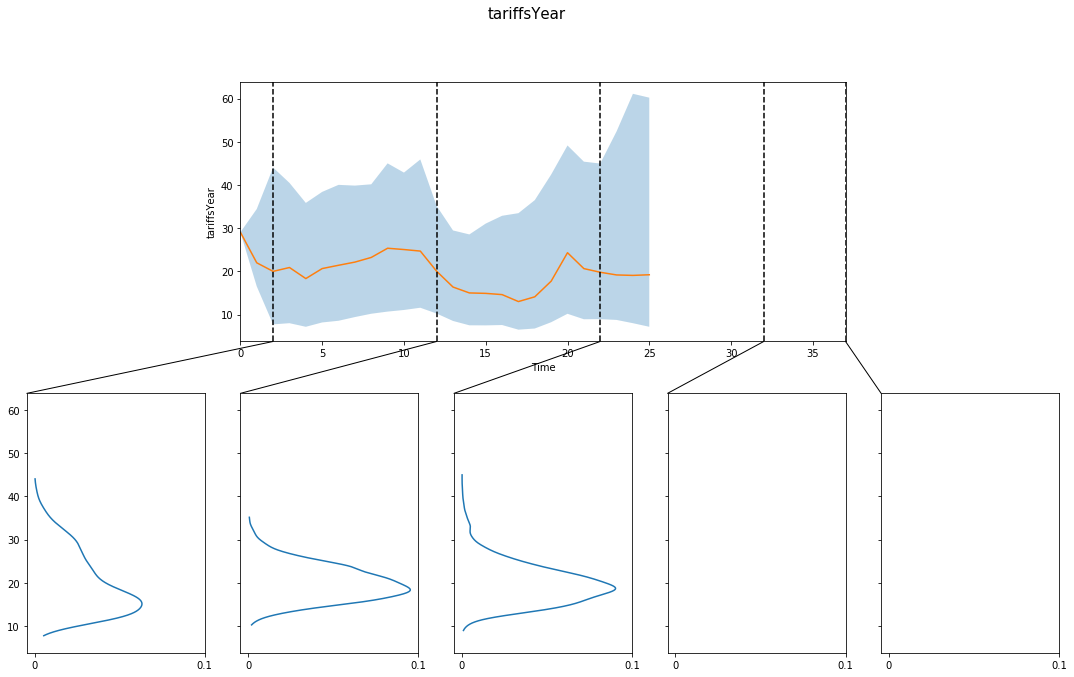

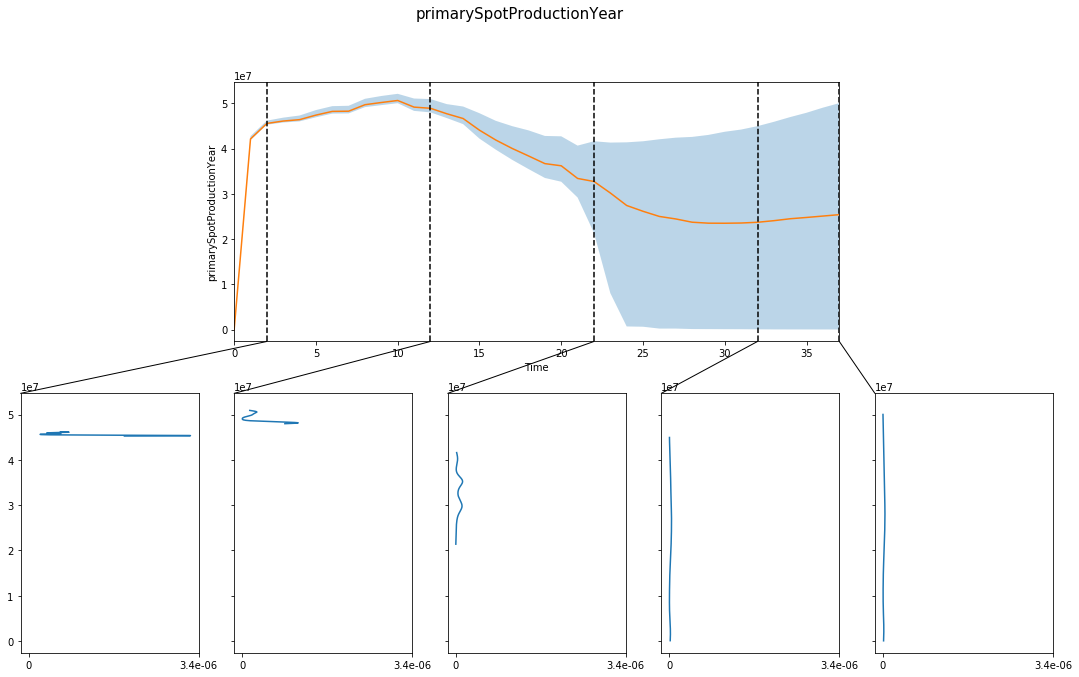

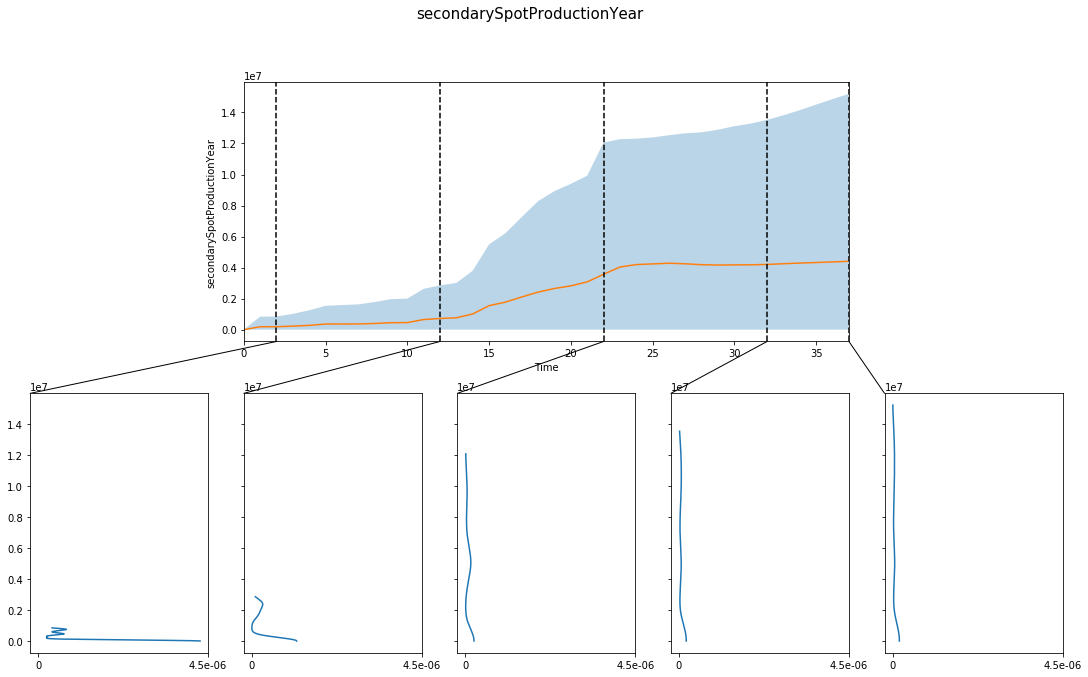

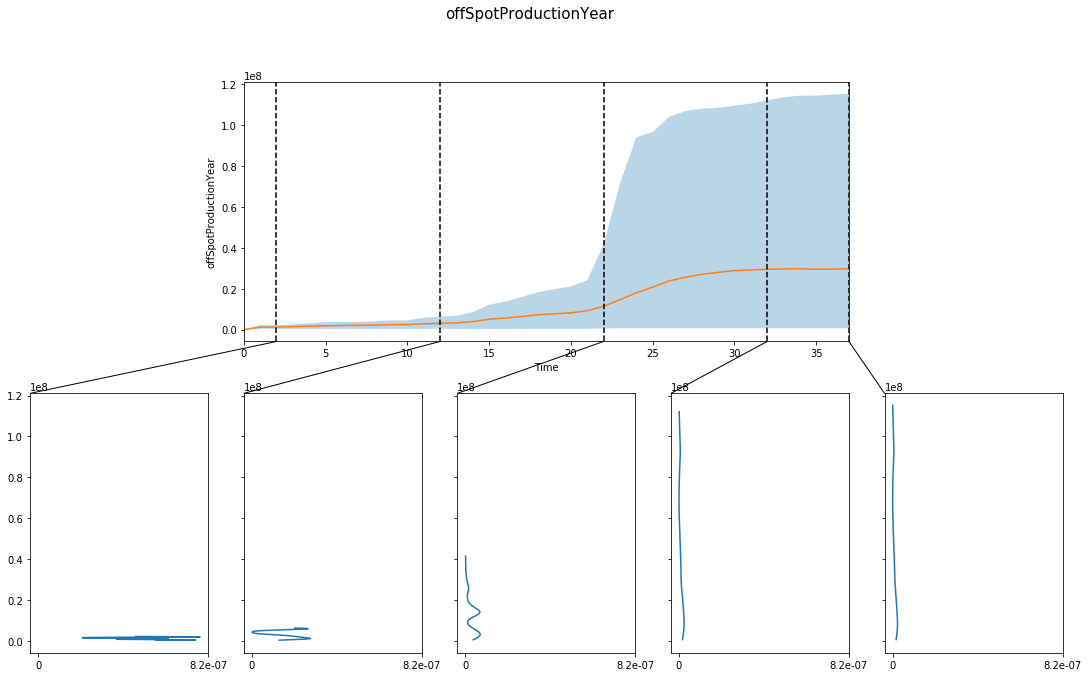

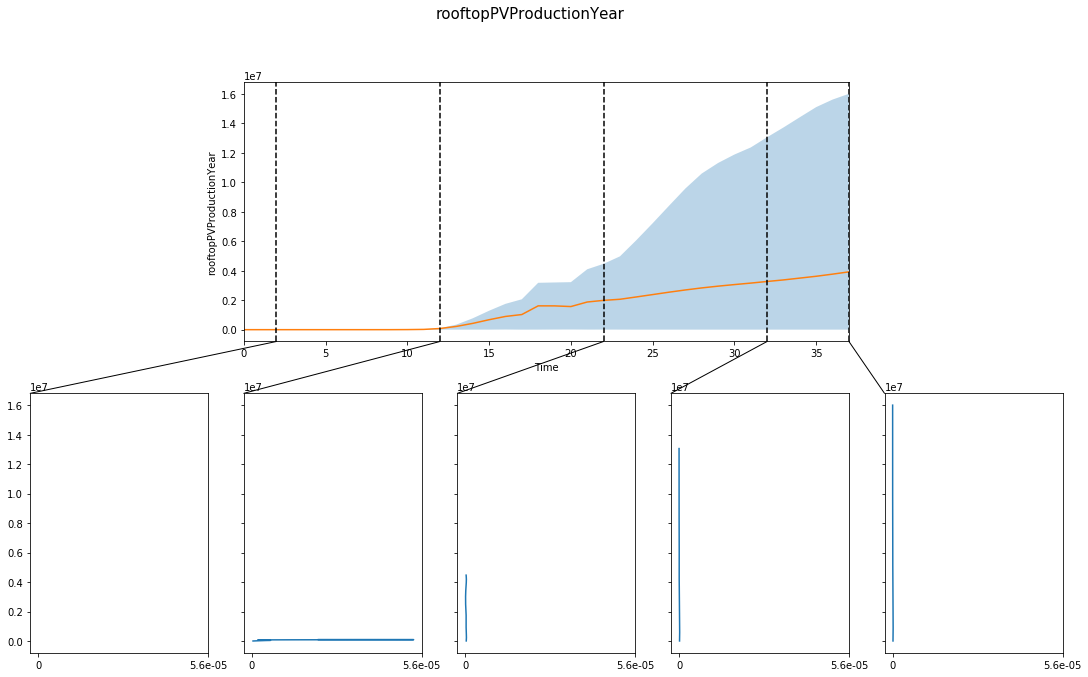

In [14]:
%matplotlib inline

from EMAworkbench.ema_workbench.analysis.plotting import multiple_densities, PlotType
from EMAworkbench.ema_workbench.analysis.plotting_util import Density 

#Create envelope plot

#l = 'semiScheduleGenSpotMarket'
# group_by='rooftopPV', density = Density.KDE, grouping_specifiers={'residential', 'business', 'both'}
# group_by='onsiteGeneration', density = Density.KDE, grouping_specifiers={'Central', 'Slow change', 'Fast change', 'Step change', 'High DER'}
#, group_by=l

for ooi in outcomes_to_show:
    fig, ax_env = multiple_densities(experiments, outcomesYear, outcomes_to_show = ooi, points_in_time=[2000-startYear,2010-startYear,2020-startYear,2030-startYear,2035-startYear], density = Density.KDE, grouping_specifiers=None , titles={ooi}, ylabels={ooi: ooi}, legend=True, fill=True, plot_type=PlotType.ENVELOPE)
    
    
    fig[0].suptitle("{}".format(ooi), fontsize=15)
    fig[0].set_size_inches(18.5, 10.5)
    
    plt.savefig('{}/fig{}.png'.format(r'C:\\Users\\angel\\Documents\\GitHub\\gr4sp\\experiments\\notebookGr4sp\\figs', '_envelope_density_%s'%(ooi)), 
                dpi=300, bbox_inches='tight')
